<a href="https://colab.research.google.com/github/isaacdavii/PNL_UNIFEI/blob/main/Introdu%C3%A7%C3%A3o_ao_PNL_UNIFEI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/flavio-mota/fundamentos-pln/master/unifei-inpe.png" align="right" width="150" />

<br/>
<br/>

# <span style="color:#336699">Introdução ao Processamento de Linguagem Natural (PLN)</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Autores: <br/>
    Flávio Belizário da Silva Mota¹ <br/>
    Isabela Neves Drummond²
    <br/><br/>
    ¹Instituto Nacional de Pesquisas Espaciais (INPE) <br/>
    ²Universidade Federal de Itajubá (UNIFEI)
    <br/>
    <br/><br/>
    Contato: <a href="mailto:flavio.mota@inpe.br">flavio.mota@inpe.br</a>; <a href="mailto:isadrummond@unifei.edu.br">isadrummond@unifei.edu.br</a>
    <br/>
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Objetivo.</b> Esse caderno Jupyter tem como objetivo apresentar alguns conceitos báscios de PLN.
</div>

<br/>

## Objetivos gerais:


*   Apresentar noções básicas de sobre o que é o PLN
*   Criar funções simples que realizem a limpeza e análise de textos
*   Classificação de textos



## O que é e para que serve um *corpus*?

*Corpus* pode ser definido como o conjunto de materiais linguísticos que serão analisados. Para os propósitos do PLN, é necessário que esses materiais estejam na forma de texto e que possam ser lidos por um programa de computador.

Vamos carregar um arquivo que contem o texto de diversos e-mails:

In [2]:
import pandas as pd

url_spam = 'https://raw.githubusercontent.com/flavio-mota/fundamentos-pln/master/spam_sms.csv'
df = pd.read_csv(url_spam,encoding='latin-1')
# Checando as dimensões do conjunto de dados
df.shape

(5569, 2)

Vamos visualizar um exemplo do conjunto de dados:

In [3]:
pd.set_option('display.max_colwidth', None)
df.head()

,classe,texto
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


## Tokenização

A *tokenização* é o processo de dividir as sentenças em palavras. Considere a frase:
> "Eu estou lendo um livro."

A tarefa de *tokenização* tem como objetivo extrair as palavras (ou tokens) dessa sentença, produzindo:
> 'Eu', 'estou', 'lendo', 'um', 'livro', ' . '

Esse tipo de extração é chamada de 'unigrama', uma vez que separa uma palavra por vez. Entretanto, é possível realizar a extração de dois ou três *tokens* por vez. Se são 2 *tokens* por vez, chamamos de **bigramas**. Se são 3, **trigramas**. Dependendo da necessidade, podemos ter **n-gramas**, sendo n um número natural.

> **n-gramas** são sequências de n palavras de um texto.

No PLN trabalhamos com *tokens* por questão de conveniência, já que temos a tendência de realizar as análises palavra por palavra.



Vamos realizar a tokenização de uma sentença simples. Para isso vamos utilizar um módulo da NLTK que facilita esse processo.

In [6]:
import nltk # Importando a biblioteca para PNL - uma das melhores bibliotecas - também tem tolkiens para PT-BR
from nltk import word_tokenize # Importando o módulo word_tokenize

# Baixar o tokenizador
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
palavras = word_tokenize('Eu estou aprendendo sobre os fundamentos do PLN')
palavras

['Eu', 'estou', 'aprendendo', 'sobre', 'os', 'fundamentos', 'do', 'PLN']

## Limpeza do texto

Em aplicações de PLN, são avaliadas unidades de texto como sílabas, palavras, frases, entre outras, e não os caracteres do texto. Sendo assim, geralmente são empregadas estratégias de limpeza do texto.

Vamos realizar a remoção da pontuação e a conversão de todo o texto para caracteres minúsculos. Podemos definir uma função para que isso possa ser feito sempre que necessário, sem repetição de códigos:

In [8]:
import re

def limpar_texto(texto):
    # Converter para minúsculas
    texto = texto.lower()

    # Remover pontuações e caracteres especiais
    texto = re.sub(r'[^\w\s]', '', texto)

    # Remover números
    texto = re.sub(r'\d+', '', texto)

    return texto

In [9]:
texto = "O Python é uma linguagem de programação poderosa! É ótimo para análise de Dados, IA, ML... :) #Python #Programming"

# Aplicar a função de limpeza ao texto
texto_limpo = limpar_texto(texto)
print(texto_limpo)

o python é uma linguagem de programação poderosa é ótimo para análise de dados ia ml  python programming


In [10]:
# Aplicar a função de limpeza à coluna de texto do DataFrame
df['texto_limpo'] = df['texto'].apply(limpar_texto)

# Mostrar o DataFrame com os textos originais e os textos limpos
df

,classe,texto,texto_limpo
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though
2,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv",freemsg hey there darling its been weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send ãâ to rcv
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune
...,...,...,...
5564,spam,"This is the 2nd time we have tried 2 contact u. U have won the Ã¥Â£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",this is the nd time we have tried contact u u have won the ãâ pound prize claim is easy call now only p per minute btnationalrate
5565,ham,Will Ã_ b going to esplanade fr home?,will ã_ b going to esplanade fr home
5566,ham,"Pity, * was in mood for that. So...any other suggestions?",pity was in mood for that soany other suggestions
5567,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free


## Stopwords

Outra forma de realizar a limpeza de um *corpus* é através da remoção de **palavras vazias**. Palavras vazias são palavras que podem ser descartadas antes de uma análise pois possuem reduzida contribuição semântica ou nocional. Geralmente são preposições, artigos, conjunções, alguns pronomes e advérbios.

A NLTK traz uma lista de 203 palavras vazias para o português. Podemos importa-las usando:

In [11]:
from nltk.corpus import stopwords

# Baixar a lista de stopwords e o tokenizador
nltk.download('stopwords')

def remover_stopwords(texto):
    # Remover stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(texto)
    texto = ' '.join([word for word in tokens if word not in stop_words])

    return texto

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vamos ver um exemplo:

In [12]:
sentenca = 'Eu estou aprendendo Python. É uma das linguagens de programação mais populares.'
print(remover_stopwords(sentenca))

Eu estou aprendendo Python . É uma das linguagens de programação mais populares .


O código acima realizou a remoção das palavras que são consideradas vazias, deixando a sentença estranha para a leitura, mas com mais significado para análises com PLN.

Vamos criar uma função que remova as palavras vazias e aplicá-la a obra Dom Casmurro e verificar a mudança no tamanho do *corpus*.

In [13]:
# Aplicar a função de limpeza à coluna de texto do DataFrame
df['texto_limpo'] = df['texto_limpo'].apply(remover_stopwords)

# Mostrar o DataFrame com os textos originais e os textos limpos
df

,classe,texto,texto_limpo
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though
2,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv",freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send ãâ rcv
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aids patent
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune
...,...,...,...
5564,spam,"This is the 2nd time we have tried 2 contact u. U have won the Ã¥Â£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",nd time tried contact u u ãâ pound prize claim easy call p per minute btnationalrate
5565,ham,Will Ã_ b going to esplanade fr home?,ã_ b going esplanade fr home
5566,ham,"Pity, * was in mood for that. So...any other suggestions?",pity mood soany suggestions
5567,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,guy bitching acted like id interested buying something else next week gave us free


## Classificando textos

### Bag of Words (BoW)

Para implementar o Bag of Words com python, podemos utilizar a [scikit-learn](https://scikit-learn.org/stable/). Especificamente, utilizaremos a CountVectorizer, que é uma classe que permite gerar a representação no formato de matriz dos textos. Utilizaremos também a biblioteca pandas, mas não vamos entrar em detalhes nessa aula. Vamos importar as bibliotecas e criar nosso documento (corpus):

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['Ciência de Dados é uma interseção entre Artes e Ciência',
          'Geralmente, alunos de Artes usam o lado direito do cérebro e estudantes de Ciência o lado esquerdo',
          'Destacar-se tanto nas Artes quanto nas Ciências ao mesmo tempo é difícil',
          'Processamento de Linguagem Natural faz parte da Ciência de Dados']


Agora, vamos utilizar o CountVectorizer para criar a representação BoW:

In [16]:
bow = CountVectorizer()
bow_df = pd.DataFrame(bow.fit_transform(corpus).todense())
bow_df.columns = sorted(bow.vocabulary_)
bow_df.head()

,alunos,ao,artes,ciência,ciências,cérebro,da,dados,de,destacar,...,nas,natural,parte,processamento,quanto,se,tanto,tempo,uma,usam
0,0,0,1,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,1,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,0,1,0,0,0,0,1,...,2,0,0,0,1,1,1,1,0,0
3,0,0,0,1,0,0,1,1,2,0,...,0,1,1,1,0,0,0,0,0,0


Podemos criar também uma representação BoW somente com os 10 termos mais frequentes:

In [19]:
bow_10 = CountVectorizer(max_features = 10)
bow_df_10 = pd.DataFrame(bow_10.fit_transform(corpus).todense())
bow_df_10.columns = sorted(bow_10.vocabulary_)
bow_df_10.head()

,artes,ciência,dados,de,lado,linguagem,mesmo,nas,natural,parte
0,1,2,1,1,0,0,0,0,0,0
1,1,1,0,2,2,0,0,0,0,0
2,1,0,0,0,0,0,1,2,0,0
3,0,1,1,2,0,1,0,0,1,1


### TF-IDF

Assim como na representação BoW, utilizaremos a scikit-learn para gerar o TF-IDF, através da classe TfidfVectorizer. Vamos empregar o mesmo corpus do exemplo anterior:

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['Ciência de Dados é uma interseção entre Artes e Ciência',
          'Geralmente, alunos de Artes usam o lado direito do cérebro e estudantes de Ciência o lado esquerdo',
          'Destacar-se tanto nas Artes quanto nas Ciências ao mesmo tempo é difícil',
          'Processamento de Linguagem Natural faz parte da Ciência de Dados']

Vamos gerar a representação TF-IDF:

In [21]:
tfidf = TfidfVectorizer()
tfidf_df = pd.DataFrame(tfidf.fit_transform(corpus).todense())
tfidf_df.columns = sorted(tfidf.vocabulary_)
tfidf_df.head()

,alunos,ao,artes,ciência,ciências,cérebro,da,dados,de,destacar,...,nas,natural,parte,processamento,quanto,se,tanto,tempo,uma,usam
0,0.000000,0.000000,0.259157,0.518314,0.000000,0.000000,0.00000,0.320110,0.259157,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.406019,0.000000
1,0.263117,0.000000,0.167944,0.167944,0.000000,0.263117,0.00000,0.000000,0.335889,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263117
2,0.000000,0.273104,0.174319,0.000000,0.273104,0.000000,0.00000,0.000000,0.000000,0.273104,...,0.546207,0.00000,0.00000,0.00000,0.273104,0.273104,0.273104,0.273104,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.216916,0.000000,0.000000,0.33984,0.267934,0.433831,0.000000,...,0.000000,0.33984,0.33984,0.33984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Classificando: Spam

Vamos classificar alguns textos como spam e não spam. Para isso, iremos empregar as técnicas que vimos anteriormente e um classificador. Ainda não vimos classificadores, mas não se preocupe. O intuito aqui é apenas ver uma das aplicações do Processamento de Linguagem Natural.

Vamos visualizar a distribuição das classes:

In [22]:
df.classe.value_counts()

classe
ham     4822
spam     747
Name: count, dtype: int64

Para representar as classes como valores numéricos de forma que o modelo de classificação consiga entender, vamos codificar cada valor (ham e spam) como 0 e 1, respectivamente, e gerar uma nova coluna chamada rotulo_num:

In [26]:
df['classe_num'] = df.classe.map({"ham":0, "spam":1})
# Checando a conversão
df.head()

,classe,texto,texto_limpo,classe_num
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs,1
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though,0
2,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv",freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send ãâ rcv,1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aids patent,0
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune,0


Vamos criar agora as variáveis x e y para armazenar os textos e os rótulos. X e y são nomes de variáveis muito empregadas no desenvolvimento de modelos de aprendizagem com python, sendo que X armazena os dados e y os rótulos:

In [27]:
x = df.texto_limpo
y = df.classe_num

É importante separar os dados em um conjunto de treinamento e um de testes:

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

print("Tamanho do conjunto de treino:", x_train.shape)
print("Tamanho do conjunto de teste:", x_test.shape)

Tamanho do conjunto de treino: (4176,)
Tamanho do conjunto de teste: (1393,)


Agora, iremos aplicar a vetorização dos dados com a técnica BoW:

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

Classificaremos os dados com o algoritmo Naïve Bayes. Esse algoritmo é um dos mais empregados em tarefas de classificação para aplicações de Processamento de Linguagem Natural:

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

Treinando o modelo:

In [32]:
%time nb.fit(x_train_dtm,y_train)

CPU times: user 9.28 ms, sys: 97 µs, total: 9.38 ms
Wall time: 9.09 ms


MultinomialNB()

Vamos gerar uma predição:

In [33]:
y_pred_class = nb.predict(x_test_dtm)

Calculando a acurácia do modelo:

In [34]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9813352476669059

O modelo alcançou uma acurácia de 98%. Mas será que ele está realmente acertando a classe que importa, ou seja, os spams?

Podemos utilizar uma matriz de confusão para verificar isso:

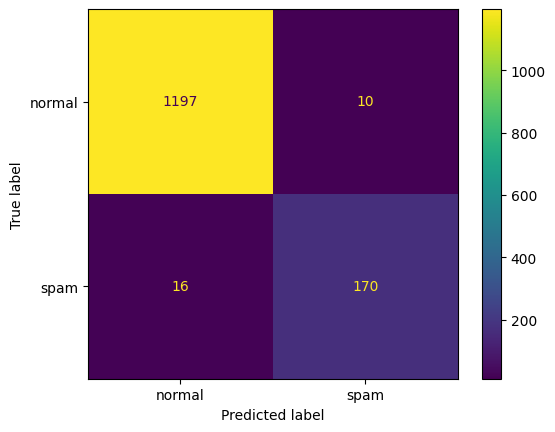

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_class, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['normal', 'spam'])
disp.plot()

plt.show()

A interpretação da matriz nos diz o seguinte:
* x - eram spam e foram classificados como spam
* x - não eram spam, mas foram classicados como spam
* x - eram spam, mas não foram classificados como spam
* x - não eram spam, e não foram classificados como spam